imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
%matplotlib inline

Read data

In [3]:
df = pd.read_csv('../data/attrition-formated.csv')

prepare data

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IsMale
0,41,1,1,1102,1,2,Life Sciences,1,2,94,...,80,0,8,0,1,6,4,0,5,0
1,49,0,2,279,8,1,Life Sciences,2,3,61,...,80,1,10,3,3,10,7,1,7,1
2,37,1,1,1373,2,2,Other,4,4,92,...,80,0,7,3,3,0,0,0,0,1
3,33,0,2,1392,3,4,Life Sciences,5,4,56,...,80,0,8,3,3,8,7,3,0,0
4,27,0,1,591,2,1,Medical,7,1,40,...,80,1,6,3,3,2,2,2,2,1


In [5]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [6]:
df = pd.get_dummies(df, columns = ['EducationField'] )

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'IsMale', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree'],
      dtype='object')

Correlations

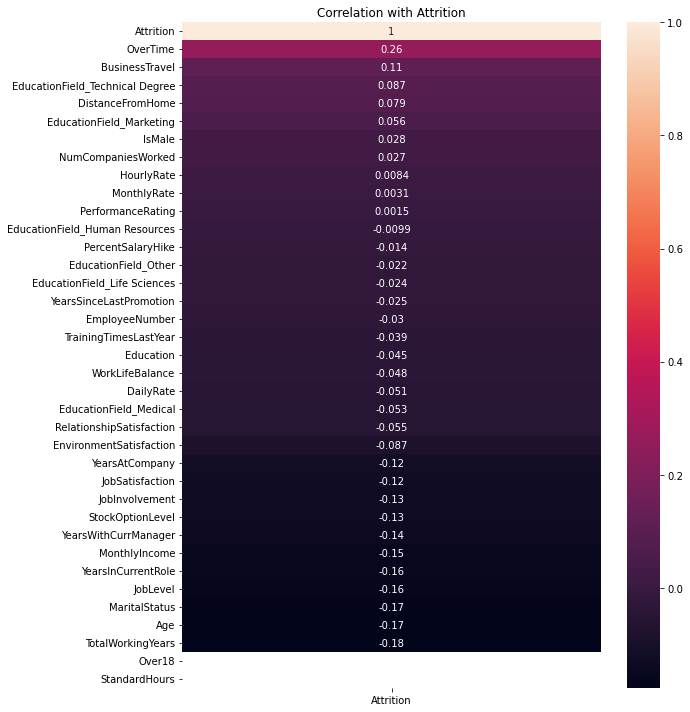

In [63]:
c = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(c[['Attrition']].sort_values('Attrition', ascending = False),annot=True);
plt.title('Correlation with Attrition')
plt.tight_layout()
plt.savefig('../output/heatmap.png');


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

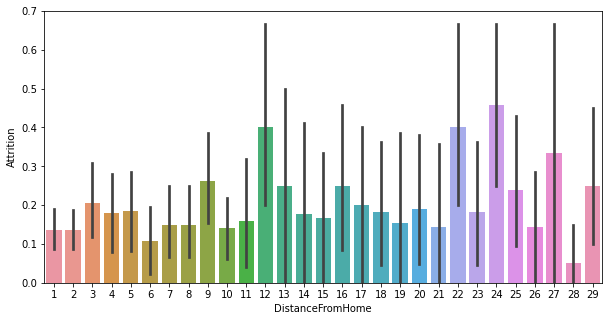

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'DistanceFromHome', y = 'Attrition', data=df)


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

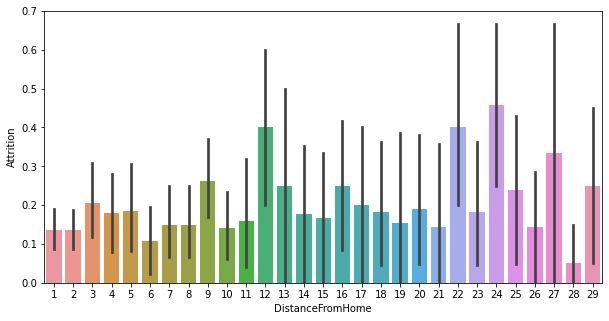

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'DistanceFromHome', y = 'Attrition', data=df, fill=True)

<AxesSubplot:xlabel='HourlyRate', ylabel='Attrition'>

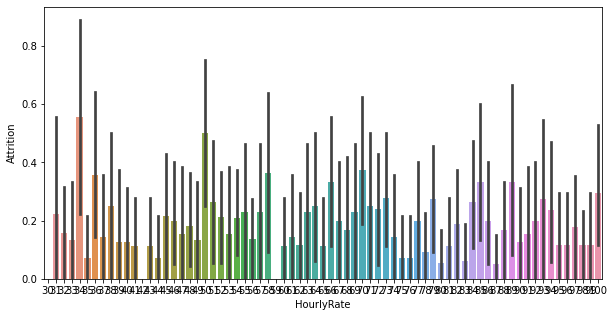

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'HourlyRate', y = 'Attrition', data=df, fill=True)

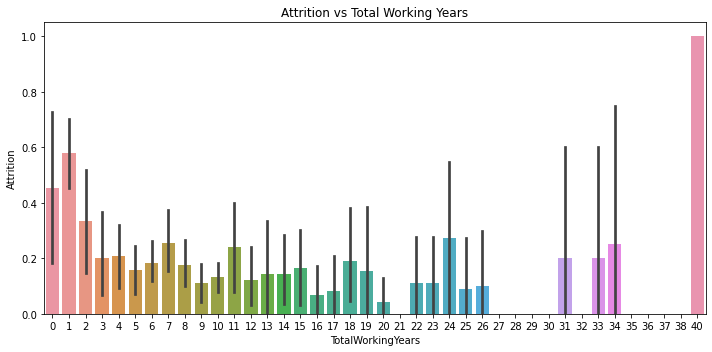

In [64]:
plt.figure(figsize=(10,5))
plt.title('Attrition vs Total Working Years')
sns.barplot(x = 'TotalWorkingYears', y = 'Attrition', data=df);
plt.tight_layout()
plt.savefig('../output/attr-vs-work.png');

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Attrition'>

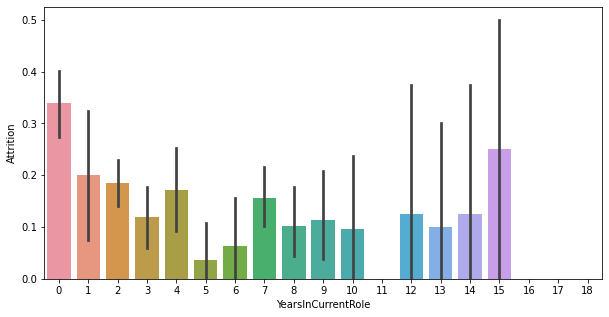

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'YearsInCurrentRole', y = 'Attrition', data=df)

None of the observed datapoints have a very strong correlation with attrition

In [ ]:
df.dropna(inplace=True)

In [11]:
logreg = LogisticRegression(max_iter = 2000 )
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Attrition']), df['Attrition'], stratify = df['Attrition'])
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg.fit(X_train, y_train)

In [12]:
logreg.fit(X_train, y_train, )

LogisticRegression(max_iter=2000)

In [13]:
logreg.score(X_test, y_test), logreg.score(X_train, y_train)

(0.8496503496503497, 0.8868144690781797)

In [14]:
coefs = pd.DataFrame(logreg.coef_).T
coefs.columns = ['coefs']
coefs['abs'] = abs(coefs['coefs'])
coefs['name'] = df.drop(columns=['Attrition']).columns


In [15]:
coefs.sort_values('abs', ascending=False)

,coefs,abs,name
16,0.859285,0.859285,OverTime
27,0.700539,0.700539,YearsSinceLastPromotion
26,-0.597028,0.597028,YearsInCurrentRole
14,0.571729,0.571729,NumCompaniesWorked
10,-0.494627,0.494627,JobSatisfaction
25,0.466230,0.466230,YearsAtCompany
22,-0.444164,0.444164,TotalWorkingYears
11,-0.415167,0.415167,MaritalStatus
6,-0.407755,0.407755,EnvironmentSatisfaction
9,-0.404016,0.404016,JobLevel


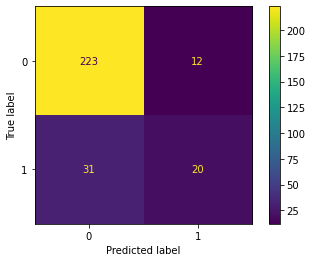

In [16]:
metrics.plot_confusion_matrix(logreg, X_test, y_test)

In [17]:
with open('../pickles/train_test.pkl', 'wb') as pickle_out:
    pickle.dump((X_train, X_test, y_train, y_test), pickle_out)

In [18]:
metrics.recall_score(y_test, logreg.predict(X_test))

0.39215686274509803

In [19]:
logreg.score(X_test, y_test)

0.8496503496503497

In [20]:
with open('../pickles/train_test_rs.pkl', 'rb') as pickle_in:
    X_train, X_test, y_train, y_test = pickle.load(pickle_in)

In [21]:
df2 = pd.read_csv('../data/attrition-formated.csv')
df2.dropna(inplace=True)
df2.drop(columns='EmployeeNumber', inplace=True)
df['Attrition'].mean()
sc = StandardScaler()
df2 = pd.get_dummies(df2, columns = ['EducationField'] )
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['Attrition']), df2['Attrition'], stratify = df2['Attrition'])
X_train_df = pd.DataFrame(X_train)
X_train_df['Attrition'] = y_train
rs = X_train_df[X_train_df['Attrition'] == 1].sample(500, replace = True)

X_train_df = pd.concat([X_train_df, rs])
X_train_df['Attrition'].mean()
X_train = sc.fit_transform(X_train_df.drop(columns=['Attrition']))
y_train = X_train_df['Attrition']
X_test = sc.transform(X_test)

In [22]:
with open('../pickles/sc.pkl', 'wb') as pickle_out:
    pickle.dump(sc, pickle_out)

In [23]:
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'IsMale', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree'],
      dtype='object')

In [24]:
with open('../pickles/train_test_rs.pkl', 'wb') as pickle_out:
    pickle.dump((X_train, X_test, y_train, y_test), pickle_out)

In [25]:
logreg.fit(X_train, y_train, )

LogisticRegression(max_iter=2000)

In [26]:
logreg.score(X_test, y_test), logreg.score(X_train, y_train)

(0.7272727272727273, 0.7745025792188651)

In [27]:
metrics.recall_score(y_test, logreg.predict(X_test))

0.7254901960784313